In [3]:
%load_ext autoreload
%autoreload 2
import sys
import matplotlib.pyplot as plt
sys.path.append("../src/plotting/")
import asym_plotter
import dataloader

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Plot Injection

In [4]:
data_piplus_pi0 = dataloader.injection_dataloader(
    project_dir = "full_v2_Mh",
    pion_pair   = "piplus_pi0",
    run_version = "Fall2018Spring2019_RGA_inbending",
    region      = "signal_purity_1_1",
    b_index     = 2
)

data_piminus_pi0 = dataloader.injection_dataloader(
    project_dir = "full_v2_Mh",
    pion_pair   = "piminus_pi0",
    run_version = "Fall2018_RGA_outbending",
    region      = "signal_purity_1_1",
    b_index     = 2
)

data_piplus_piminus = dataloader.injection_dataloader(
    project_dir = "full_v2_Mh",
    pion_pair   = "piplus_piminus",
    run_version = "Fall2018Spring2019_RGA_inbending",
    region      = "signal",
    b_index     = 2
)

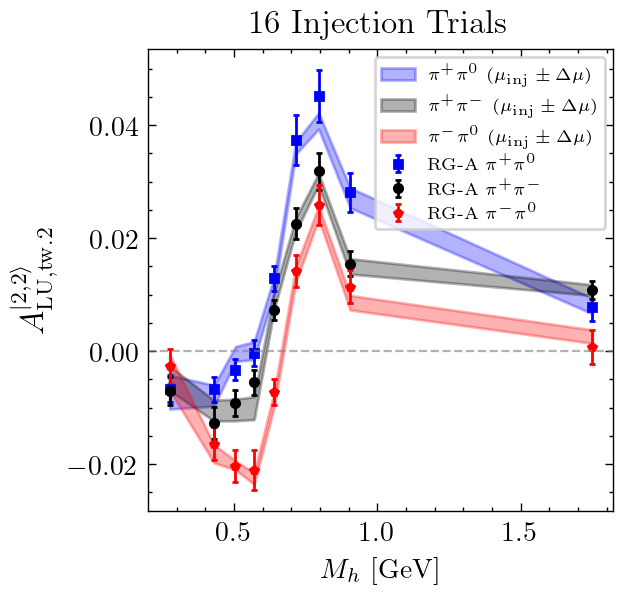

In [11]:
fig,ax = plt.subplots(1,1,dpi=200,figsize=(3,3))
asym_plotter.fetchAxInjection([data_piplus_pi0,data_piplus_piminus,data_piminus_pi0],ax=ax,bin_label="$M_{h}$ [GeV]")
plt.show()

# Plot Single

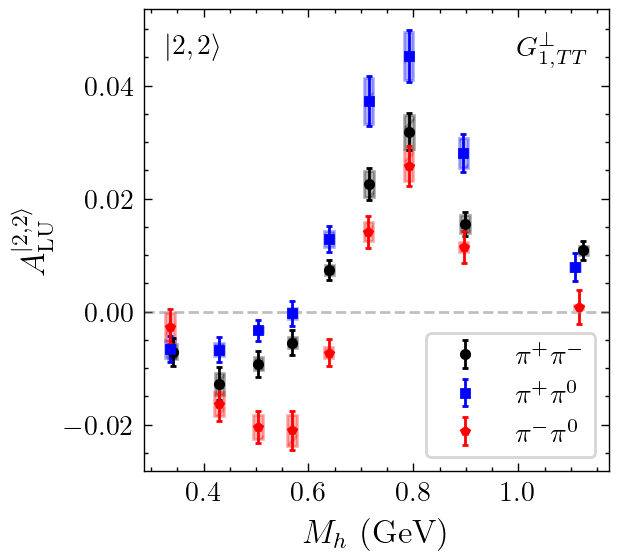

In [12]:
path = "../out/full_v2_Mh/asymmetry_results.yaml"
data = dataloader.loadFromYamlPath(path)
pairs = [{"pair":"piplus_piminus"},
         {"pair":"piplus_pi0"},
         {"pair":"piminus_pi0"}]
fig,ax = plt.subplots(1,1,dpi=200,figsize=(3,3))
asym_plotter.fetchAx(yamlData=data, L=2, M=2, twist=2, series_specs=pairs, ax=ax, show_sys_band=True, A_raw = True, bin_var="Mh")
plt.show()

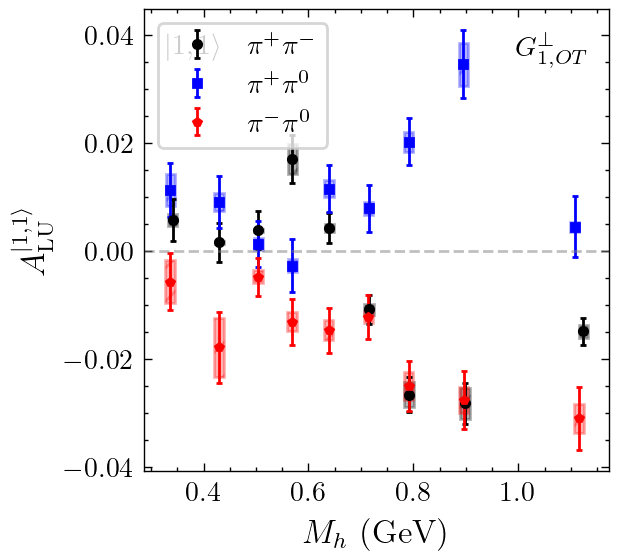

In [53]:
path = "../out/full_v1_Mh/asymmetry_results.yaml"
data = dataloader.loadFromYamlPath(path)
pairs = [{"pair":"piplus_piminus"},
         {"pair":"piplus_pi0"},
         {"pair":"piminus_pi0"}]
fig,ax = plt.subplots(1,1,dpi=200,figsize=(3,3))
asym_plotter.fetchAx(yamlData=data, L=1, M=1, twist=2, series_specs=pairs, ax=ax, show_sys_band=True, A_raw = True, bin_var="Mh")
plt.show()

# Plot Single w/ Sys

(<Figure size 800x1000 with 2 Axes>,
 (<Axes: xlabel='$M_{h}\\ (\\mathrm{GeV})$', ylabel='$A_{\\mathrm{LU}}^{|1,1\\rangle}$'>,
  <Axes: ylabel='$\\Delta A$'>))

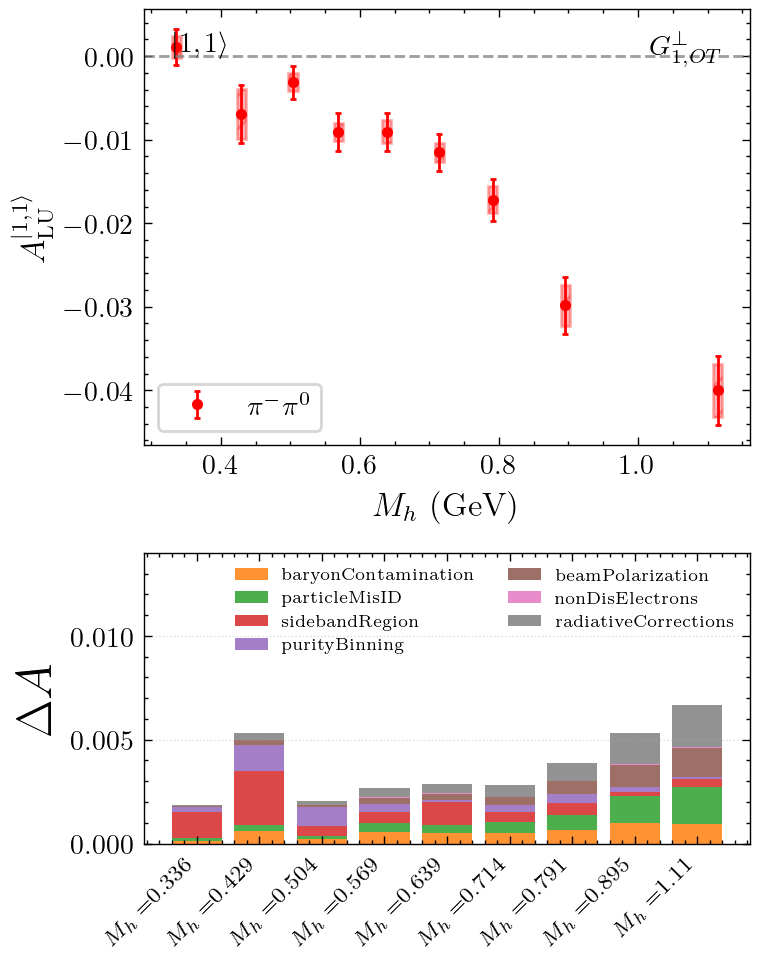

In [55]:
path = "../out/full_v0/asymmetry_results.yaml"
data = dataloader.loadFromYamlPath(path)

asym_plotter.plotSysFig(yamlData=data, L=1, M=1, twist=2, pair="piminus_pi0", show_sys_band=True, bin_var='Mh')

(<Figure size 800x1000 with 2 Axes>,
 (<Axes: xlabel='$M_{h}\\ (\\mathrm{GeV})$', ylabel='$A_{\\mathrm{LU}}^{|1,1\\rangle}$'>,
  <Axes: ylabel='$\\Delta A$'>))

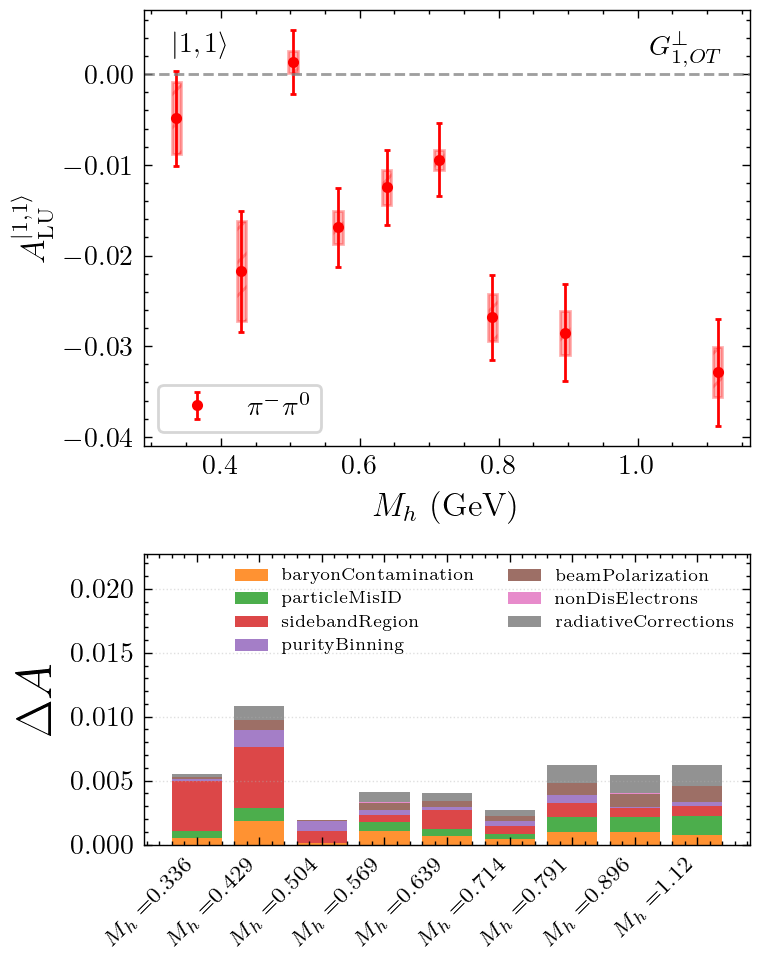

In [56]:
path = "../out/full_v1_Mh/asymmetry_results.yaml"
data = dataloader.loadFromYamlPath(path)

asym_plotter.plotSysFig(yamlData=data, L=1, M=1, twist=2, pair="piminus_pi0", show_sys_band=True, bin_var='Mh')

# Plot Bin Migration Unfolding Results

<Axes: xlabel='$M_{h}\\ (\\mathrm{GeV})$', ylabel='$A_{\\mathrm{LU}}^{|2,1\\rangle}$'>

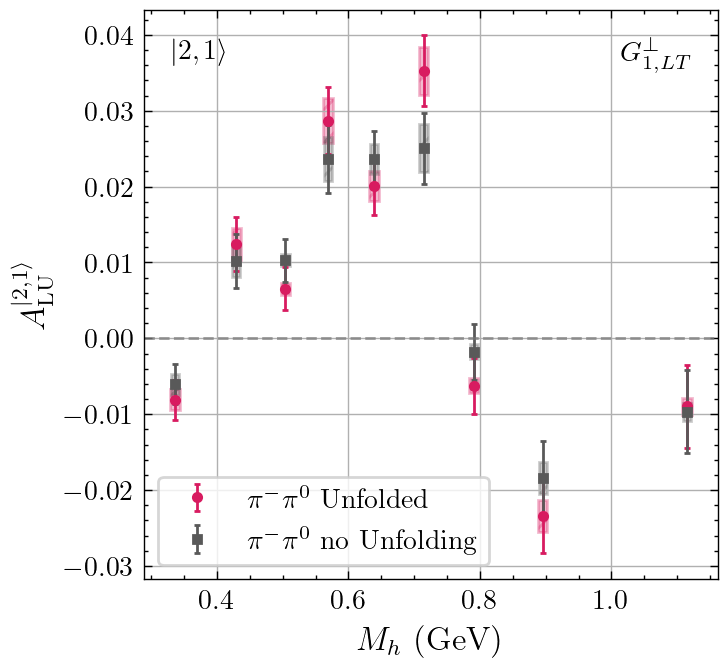

In [29]:
path = "../out/full_v2_Mh/asymmetry_results.yaml"
data = dataloader.loadFromYamlPath(path)

specs = [{'pair': 'piminus_pi0'}]
fig,ax = plt.subplots(1,1,dpi=200,figsize=(3.7,3.7))
asym_plotter.plotACompare(data, specs, twist=2, L=2, M=1, bin_var='Mh',
                  xlim=None, ylim=None, grid=True, show_sys_band=True, ax=ax)

<Axes: xlabel='$M_{h}\\ (\\mathrm{GeV})$', ylabel='$A_{\\mathrm{LU}}^{|2,1\\rangle}$'>

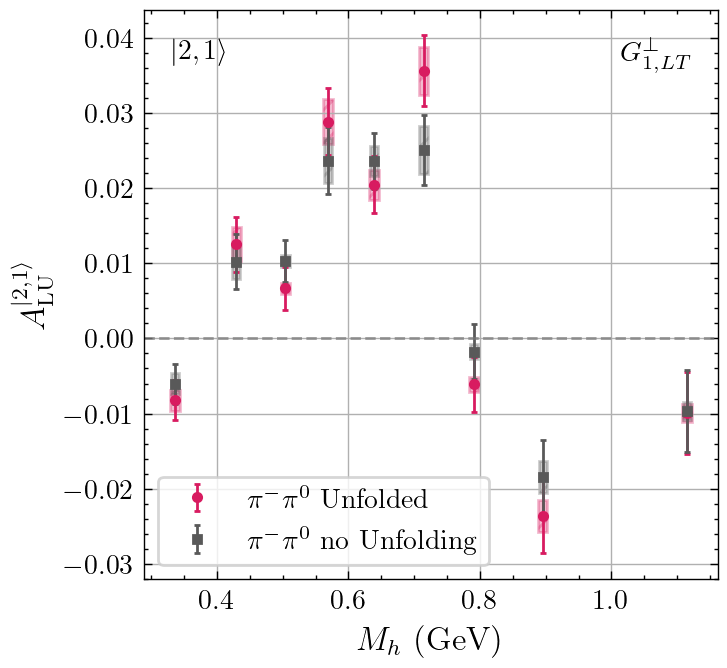

In [63]:
path = "../out/full_v0/asymmetry_results.yaml"
data = dataloader.loadFromYamlPath(path)

specs = [{'pair': 'piminus_pi0'}]
fig,ax = plt.subplots(1,1,dpi=200,figsize=(3.7,3.7))
asym_plotter.plotACompare(data, specs, twist=2, L=2, M=1, bin_var='Mh',
                  xlim=None, ylim=None, grid=True, show_sys_band=True, ax=ax)

# Grid Plot

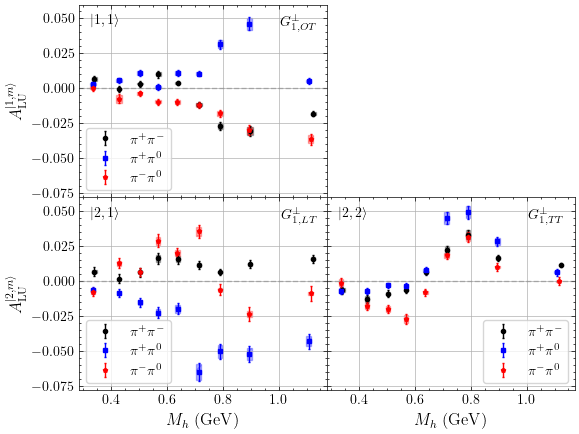

In [31]:
path = "../out/full_v2_Mh/asymmetry_results.yaml"
data = dataloader.loadFromYamlPath(path)

specs = [{"pair":"piplus_piminus"},
         {"pair":"piplus_pi0"},
         {"pair":"piminus_pi0"}]
fig = asym_plotter.plot_grid(data, specs, 2, bin_var='Mh', grid=True,show_sys_band=True)
plt.show()